<a href="https://colab.research.google.com/github/Faiqulilmi16/Thesis/blob/main/Klasifikasi_Neuroticism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import seed
import numpy as np
from tensorflow.keras import datasets, layers, models
from PIL import Image
from keras.preprocessing import image

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '14iVmpU16_73TWh9NSyxJOzA_e-EcHxAl'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/Datatrain5.zip"

Archive:  Datatrain5.zip
replace Datatrain5/A/datatrain001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
train_labels = pd.read_csv('/content/Datatrain5/neuroticism.csv')
train_labels.head()

,id,labels,Rendah,Sedang,Tinggi
0,datatrain001,"[""Tinggi""]",0,0,1
1,datatrain002,"[""Tinggi""]",0,0,1
2,datatrain003,"[""Tinggi""]",0,0,1
3,datatrain004,"[""Sedang""]",0,1,0
4,datatrain005,"[""Sedang""]",0,1,0


In [ ]:
train_labels.columns

Index(['id', 'labels', 'Rendah', 'Sedang', 'Tinggi'], dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img('Datatrain5/Z/'+train_labels['id'][i]+'.png',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 105/105 [00:00<00:00, 986.20it/s] 


In [ ]:
X.shape

(105, 200, 200, 3)

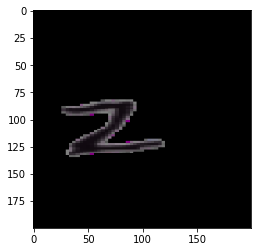

In [ ]:
plt.imshow(X[4])

In [ ]:
y = np.array(train_labels.drop(['id', 'labels'],axis=1))
y.shape

(105, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_150 (Dropout)        (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_151 (Dropout)        (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 43, 43, 64)      

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

f1_metric = tf.keras.metrics.F1Score(average='macro')

# Use the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_metric, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
from tensorflow.keras.callbacks import Callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=2, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=64)

Epoch 1/10
2/2 [==============================] - 8s 2s/step - loss: 0.6985 - accuracy: 0.3288 - f1_score: 0.2546 - precision_25: 0.2941 - recall_25: 0.4110 - val_loss: 0.6367 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_precision_25: 0.5625 - val_recall_25: 0.5625
Epoch 2/10
2/2 [==============================] - 5s 1s/step - loss: 0.5902 - accuracy: 0.5205 - f1_score: 0.2842 - precision_25: 0.5263 - recall_25: 0.5479 - val_loss: 0.5279 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_precision_25: 0.5625 - val_recall_25: 0.5625
Epoch 3/10
2/2 [==============================] - 5s 1s/step - loss: 0.5729 - accuracy: 0.5342 - f1_score: 0.3019 - precision_25: 0.5584 - recall_25: 0.5890 - val_loss: 0.5492 - val_accuracy: 0.5625 - val_f1_score: 0.2400 - val_precision_25: 0.5625 - val_recall_25: 0.5625
Epoch 4/10
2/2 [==============================] - 5s 1s/step - loss: 0.5492 - accuracy: 0.5479 - f1_score: 0.3041 - precision_25: 0.5152 - recall_25: 0.4658 - val_loss: 0.5899 - val

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datatest/A/datatest11.png',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Sedang (0.557)


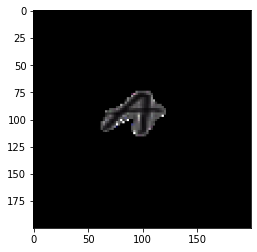

In [ ]:
classes = np.array(train_labels.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_1 = np.argsort(proba[0])[:-2:-1]
for i in range(1):
    print("{}".format(classes[top_1[i]])+" ({:.3})".format(proba[0][top_1[i]]))
plt.imshow(img)